In [81]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer 
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score


In [82]:
""" !pip uninstall emoji
pip install emoji==1.7.0
pip install imbalanced-learn """

' !pip uninstall emoji\npip install emoji==1.7.0\npip install imbalanced-learn '

In [83]:
df1 = pd.read_csv("reviews_data_dump/reviews_badminton/data.csv")
df2 = pd.read_csv("reviews_data_dump/reviews_tawa/data.csv")
df3 = pd.read_csv("reviews_data_dump/reviews_tea/data.csv")

# Assuming df1, df2, and df3 are your DataFrames with the same columns


In [84]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')
Index(['Reviewer_Name', 'Reviewer_Rating', 'Review_Title', 'Review_Text',
       'Place_of_Review', 'Date_of_Review', 'Up_Votes', 'Down_Votes'],
      dtype='object')
Index(['reviewer_name', 'reviewer_rating', 'review_title', 'review_text',
       'place_of_review', 'Date_of_review', 'up_votes', 'Down_votes'],
      dtype='object')


In [85]:
import pandas as pd

# Assuming df1, df2, and df3 are your DataFrames

# For df1
df1 = df1.rename(columns={
    'Reviewer Name': 'reviewer_name',
    'Review Title': 'review_title',
    'Place of Review': 'place_of_review',
    'Up Votes': 'up_votes',
    'Down Votes': 'down_votes',
    'Month': 'date_of_review',  # Assuming you want to rename 'Month' to match 'Date_of_Review'
    'Review text': 'review_text',
    'Ratings': 'reviewer_rating'
})

# For df2
df2 = df2.rename(columns={
    'Reviewer_Name': 'reviewer_name',
    'Reviewer_Rating': 'reviewer_rating',
    'Review_Title': 'review_title',
    'Review_Text': 'review_text',
    'Place_of_Review': 'place_of_review',
    'Date_of_Review': 'date_of_review',
    'Up_Votes': 'up_votes',
    'Down_Votes': 'down_votes'
})

df3 = df3.rename(columns={
    'reviewer_name': 'reviewer_name',
    'reviewer_rating': 'reviewer_rating',
    'review_title': 'review_title',
    'review_text': 'review_text',
    'place_of_review': 'place_of_review',
    'Date_of_review': 'date_of_review',  # Making sure the case matches
    'up_votes': 'up_votes',
    'Down_votes': 'down_votes'  # Ensuring consistency in naming
})

df = pd.concat([df1, df2, df3], ignore_index=True)
df['review_text'] = df['review_text'].str.cat(df['review_title'], sep=' ')
df.to_csv('concatenated_reviews.csv', index=False)


In [86]:
df.shape

(20219, 8)

In [87]:
df.head()

,reviewer_name,review_title,place_of_review,up_votes,down_votes,date_of_review,review_text,reviewer_rating
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4.0
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1.0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1.0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3.0
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1.0


In [88]:
df.tail()

,reviewer_name,review_title,place_of_review,up_votes,down_votes,date_of_review,review_text,reviewer_rating
20214,Omm Prakash,Simply awesome,"Certified Buyer, Dhamanagar",26.0,5.0,Omm Prakash,Nice for red tea.Valeu for moneyREAD MORE Simp...,5.0
20215,Ritu Raj,Good choice,"Certified Buyer, Katihar District",19.0,4.0,Ritu Raj,niceREAD MORE Good choice,4.0
20216,Arun Saini,Terrible product,"Certified Buyer, Haridwar",13.0,2.0,Arun Saini,Tata Gold Vs Tata Tea Premium👍Tata Tea Premiu...,1.0
20217,Amitabh Shahi,Just wow!,"Certified Buyer, Darbhanga",32.0,10.0,Amitabh Shahi,I believe that it's the best packaged tea in t...,5.0
20218,Rohan Bhowmik,Simply awesome,"Certified Buyer, Paschim Medinipur District",69.0,29.0,Rohan Bhowmik,Very good product.READ MORE Simply awesome,5.0


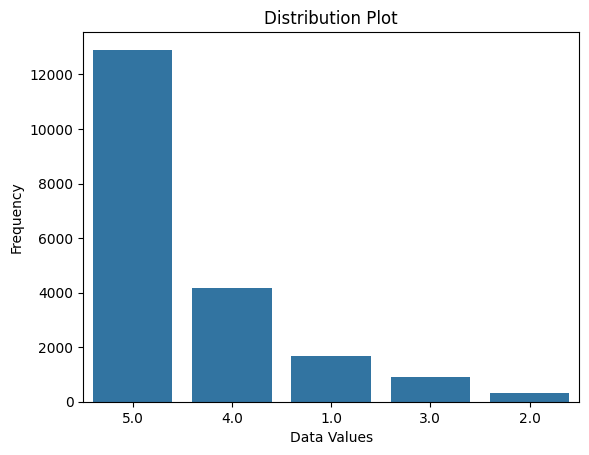

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data: Generating random data using numpy

# Creating the distribution plot
 
sns.countplot(data=df, 
              x='reviewer_rating', 
              order=df.reviewer_rating.value_counts().index)
plt.title('Distribution Plot')
plt.xlabel('Data Values')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [90]:
pos_neg = [] 
for i in range(len(df['reviewer_rating'])): 
    if df['reviewer_rating'][i] >=4: 
        pos_neg.append(1) 
  
    else: 
        pos_neg.append(0) 
  
df['label'] = pos_neg 

In [91]:
df.label.value_counts()

label
1    17076
0     3143
Name: count, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20219 entries, 0 to 20218
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviewer_name    20209 non-null  object 
 1   review_title     20209 non-null  object 
 2   place_of_review  20169 non-null  object 
 3   up_votes         20209 non-null  float64
 4   down_votes       20209 non-null  float64
 5   date_of_review   19754 non-null  object 
 6   review_text      20209 non-null  object 
 7   reviewer_rating  19973 non-null  float64
 8   label            20219 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 1.4+ MB


In [93]:
nltk.download("stopwords")
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khaled\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
df.columns

Index(['reviewer_name', 'review_title', 'place_of_review', 'up_votes',
       'down_votes', 'date_of_review', 'review_text', 'reviewer_rating',
       'label'],
      dtype='object')

In [95]:
print(df.duplicated(keep=False).sum())
df.drop_duplicates(inplace=True)

9300


In [96]:
df.label.value_counts()

label
1    8782
0    2212
Name: count, dtype: int64

In [97]:
df.dropna(subset=['review_text'], inplace=True)

In [98]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# import re
# import nltk

# # Ensure you have downloaded the necessary NLTK resources
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# # Assuming 'df' is your DataFrame and the reviews are in the 7th column (index 6)

# # Enhance stopwords list with custom non-informative words/phrases
# custom_stopwords = set(stopwords.words("english")) | {"read", "more", "product", "yonex", "mavi", "350", "shuttle", "cork"}

# corpus = []
# lemmatizer = WordNetLemmatizer()


# for i in range(df.shape[0]):
#     # Convert to lowercase
#     review =  str(df.iloc[i, 6]).lower()
    
#     # Remove special characters and numbers
#     review = re.sub("[^a-z\s]", "", review)
    
#     # Split into words
#     review = review.split()
#     review = ''.join(char for char in review if char not in emoji.UNICODE_EMOJI)
#      review = review.translate(str.maketrans('', '', string.punctuation))
#     # Lemmatization and stopwords removal including custom ones
#     review = [lemmatizer.lemmatize(word) for word in review if word not in custom_stopwords]
    
#     # (Optional) Remove words shorter than 3 characters
#     review = [word for word in review if len(word) > 2]
    
#     # Joining back into a string
#     review = " ".join(review)
    
#     corpus.append(review)


In [99]:
from nltk.stem import PorterStemmer
import re
import string
import emoji

corpus = []
custom_stopwords = set(stopwords.words("english")) | {"read", "READ MORE","more", "product", "yonex", "mavi", "350", "shuttle", "cork"}

# Define a function to clean text
def clean_text(text):
    text = ''.join(char for char in text if char not in emoji.UNICODE_EMOJI)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

ps = PorterStemmer()

for i in range(df.shape[0]):
    review = re.sub("[^a-zA-Z]", " ", str(df.iloc[i, 6]))
    review = review.lower()
    review = review.split()
    review = [word for word in review if len(word) > 2]
    review = clean_text(" ".join(review))
    review = [ps.stem(word) for word in review.split() if not word in custom_stopwords]
    review = " ".join(review)
    corpus.append(review)


In [100]:
corpus

['nice good qualiti price rise bad sign afford price especi play everyday kindli help term price thank nice',
 'suppli mavi outsid cover insid cheapest sad hear wast money',
 'worst damag shuttlecock pack new box origin buy flipkart platform chosen fraud buyer meet expect',
 'quit nowaday qualiti cork like year back use mavi year qualiti cork good time get qualiti cork like rate cork also much sorri say like experi statment true knowledgeread fair',
 'pricedjust retail understand wat advantag buy di frm flipkrtread price',
 'good qualiti deliv time mind blow purchas',
 'best purchas good qualiti durabl averag ship goodread must buy',
 'good qualiti origin shuttl classi',
 'awesomeread great',
 'nice origin productsread wow',
 'green cap shuttlecock realli awesom qualiti best good pack green cap shuttlecock play warm condit worth money simpli love wow',
 'best class terrif purchas',
 'genuin price less near shopread worth everi penni',
 'second time get open bundl mavi realli believ ori

In [101]:
#df.drop(columns=['reviewer_name', 'place_of_review', 'up_votes', 'down_votes', 'date_of_review','reviewer_rating'], inplace=True)

In [102]:
# from collections import Counter

# def count_words(text_array):
#     combined_text = ' '.join(text_array)
#     words = combined_text.split()
#     word_counts = Counter(words)
#     return word_counts


# word_counts = count_words(corpus)
# sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
# for word, count in sorted_word_counts:
#     print(f"{word}: {count}")


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(corpus).toarray()
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
print('TF-IDF Vectorization completed')


TF-IDF Vectorization completed


In [104]:
y = df.iloc[:,-1]

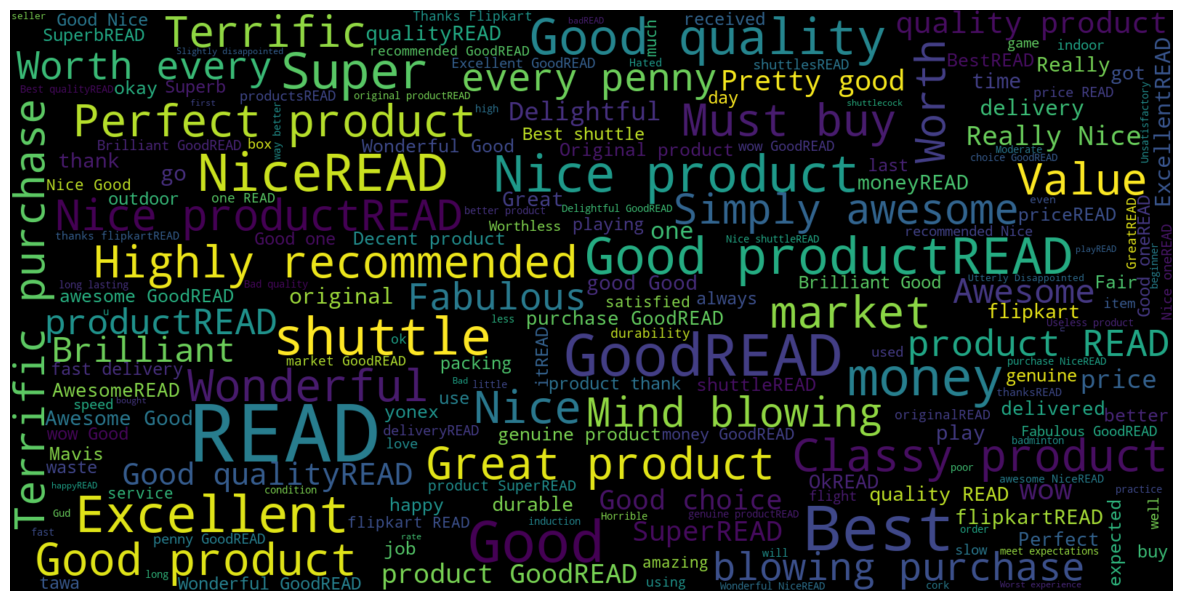

In [105]:
 
consolidated = ' '.join( 
    word for word in df['review_text'][df['label'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                      random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show()

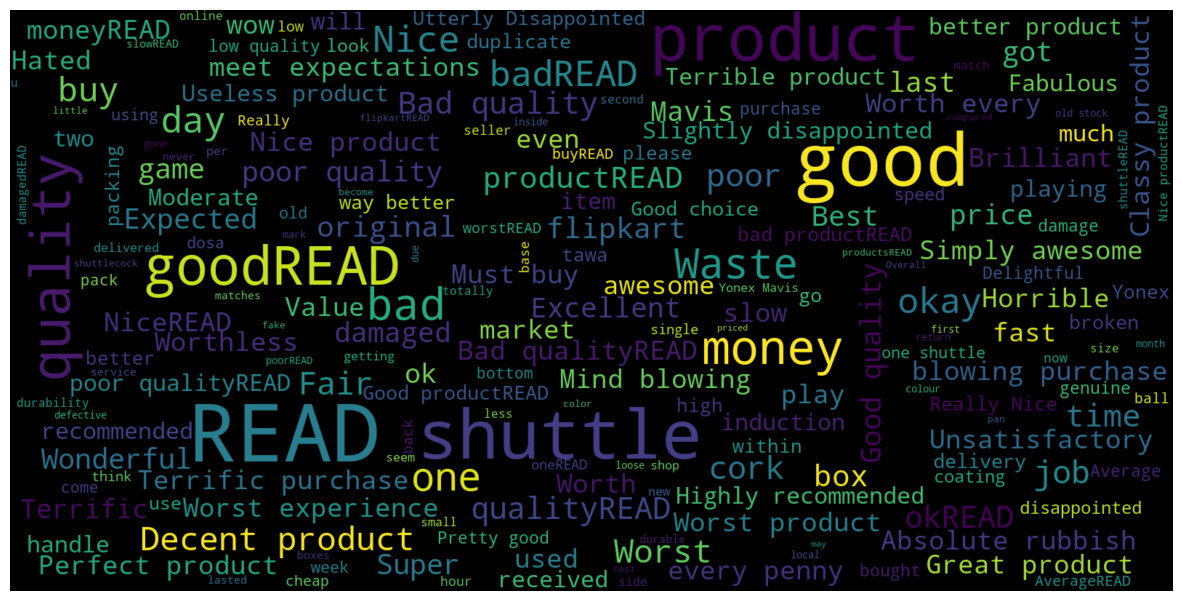

In [106]:
 
consolidated = ' '.join( 
    word for word in df['review_text'][df['label'] ==0 ].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                      random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show()

In [107]:
Xdf = pd.DataFrame(data = X, columns=tfidf_vectorizer.get_feature_names_out())
ydf = pd.DataFrame(data = y.values, columns=["Target"])
data = pd.concat([Xdf, ydf], axis=1)
data.T

,0,1,2,3,4,5,6,7,8,9,...,10980,10981,10982,10983,10984,10985,10986,10987,10988,10989
aajao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aapk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aboutread,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absenc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youtub,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yummi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

smote = SMOTE()

X_train_res, y_train_res = smote.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_res,y_train_res,train_size = 0.8 ,random_state=1,stratify=y_train_res)

In [109]:
""" from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 
  
#testing the model 
pred = model.predict(X_test) 
print(f1_score(y_test, pred, average=None)) """

' from sklearn.tree import DecisionTreeClassifier \nfrom sklearn.metrics import accuracy_score\nmodel = DecisionTreeClassifier(random_state=0) \nmodel.fit(X_train,y_train) \n  \n#testing the model \npred = model.predict(X_test) \nprint(f1_score(y_test, pred, average=None)) '

In [110]:
""" from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred, average=None)) """

' from sklearn.ensemble import RandomForestClassifier\nmodel = RandomForestClassifier(n_estimators= 500)\nmodel.fit(X_train,y_train)\ny_pred = model.predict(X_test)\nprint(f1_score(y_test, y_pred, average=None)) '

In [111]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test,y_pred) 
  
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,  
#                                             display_labels = [False, True]) 
  
# cm_display.plot() 
# plt.show()

In [112]:
""" from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"F1-Score: {f1_score(y_test, predictions)}") """

' from sklearn.linear_model import LogisticRegression\n\nmodel = LogisticRegression()\nmodel.fit(X_train, y_train)\npredictions = model.predict(X_test)\nprint(f"F1-Score: {f1_score(y_test, predictions)}") '

In [114]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier( random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average=None))

[0.91295719 0.91221047]


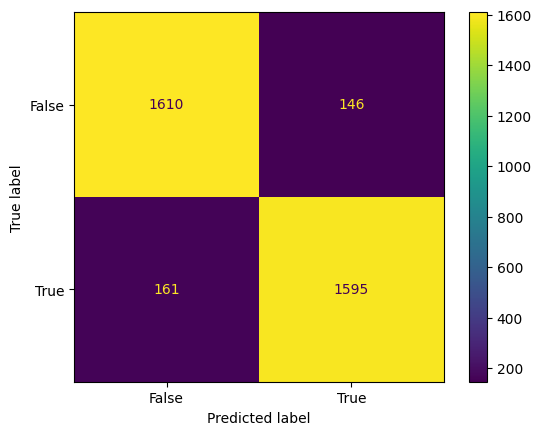

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred) 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]) 
cm_display.plot() 
plt.show()


In [116]:
""" from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Initialize and train XGBoost classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict on test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_f1 = f1_score(y_test, xgb_predictions)
print(f"F1 Score (XGBoost): {xgb_f1}")
 """

' from xgboost import XGBClassifier\nfrom sklearn.metrics import f1_score\n\n# Initialize and train XGBoost classifier\nxgb_model = XGBClassifier()\nxgb_model.fit(X_train, y_train)\n\n# Predict on test set\nxgb_predictions = xgb_model.predict(X_test)\n\n# Evaluate XGBoost model\nxgb_f1 = f1_score(y_test, xgb_predictions)\nprint(f"F1 Score (XGBoost): {xgb_f1}")\n '

In [117]:
""" 
    clf = MultinomialNB(alpha=0.0225)
    
    sgd_model = SGDClassifier(
        max_iter     = 9000, 
        tol          = 1e-4, 
        random_state = 6743,
        loss         = "modified_huber"
    ) 
    
    p={
        'verbose'          : -1,
        'n_iter'           : 3000,
        'colsample_bytree' : 0.7800,
        'colsample_bynode' : 0.8000, 
        'random_state'     : 6743,
        'metric'           : 'auc',
        'objective'        : 'cross_entropy',
        'learning_rate'    : 0.00581909898961407, 
      }
    lgb=LGBMClassifier(**p)
    
    
    cat = CatBoostClassifier(
        iterations        = 3000,
        verbose           = 0,
        subsample         = 0.35,
        random_seed       = 6543,
        allow_const_label = True,
        loss_function     = 'CrossEntropy',
        learning_rate     = 0.005599066836106983,
    )
    
    
    ensemble = VotingClassifier(
        estimators = [
                      ('lgb', lgb), 
                      ('cat', cat)],
        voting     = 'soft', 
        n_jobs     = -1
    )
ensemble.fit(X_train, y_train)
predictions = ensemble.predict(X_test)
print(f"F1-Score: {f1_score(y_test, predictions)}") """

' \n    clf = MultinomialNB(alpha=0.0225)\n    \n    sgd_model = SGDClassifier(\n        max_iter     = 9000, \n        tol          = 1e-4, \n        random_state = 6743,\n        loss         = "modified_huber"\n    ) \n    \n    p={\n        \'verbose\'          : -1,\n        \'n_iter\'           : 3000,\n        \'colsample_bytree\' : 0.7800,\n        \'colsample_bynode\' : 0.8000, \n        \'random_state\'     : 6743,\n        \'metric\'           : \'auc\',\n        \'objective\'        : \'cross_entropy\',\n        \'learning_rate\'    : 0.00581909898961407, \n      }\n    lgb=LGBMClassifier(**p)\n    \n    \n    cat = CatBoostClassifier(\n        iterations        = 3000,\n        verbose           = 0,\n        subsample         = 0.35,\n        random_seed       = 6543,\n        allow_const_label = True,\n        loss_function     = \'CrossEntropy\',\n        learning_rate     = 0.005599066836106983,\n    )\n    \n    \n    ensemble = VotingClassifier(\n        estimators =

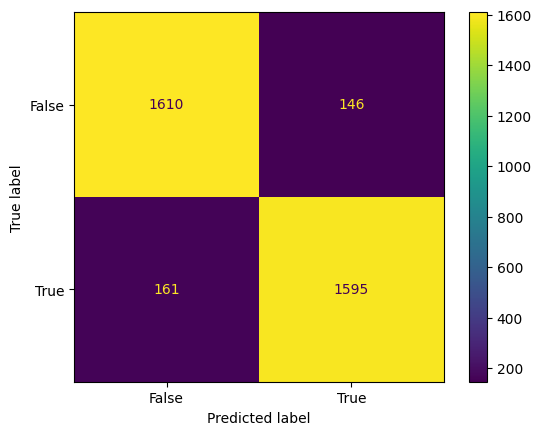

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred) 

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]) 
cm_display.plot() 
plt.show()


In [119]:
import joblib
import os
# Serialization
joblib.dump(clf, 'model.pkl')

['model.pkl']

In [120]:
from sklearn import metrics
model = joblib.load('model.pkl')
%time y_test_pred = model.predict(X_test)
print("Accuracy Score", metrics.accuracy_score(y_test, y_test_pred))

CPU times: total: 625 ms
Wall time: 646 ms
Accuracy Score 0.9125854214123007
